<a href="https://colab.research.google.com/github/leejineun/ai-class/blob/main/10_face_classification(%EC%8B%9C%EA%B0%81%ED%99%94).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cafedobby","key":"976f1c5089b99a6ce52acd17a11d3e16"}'}

In [2]:
!ls

kaggle.json  sample_data


In [3]:
!mkdir -p ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d jessicali9530/celeba-dataset

 99% 1.32G/1.33G [00:08<00:00, 123MB/s]
100% 1.33G/1.33G [00:08<00:00, 164MB/s]


In [6]:
!ls

celeba-dataset.zip  kaggle.json  sample_data


In [7]:
!unzip celeba-dataset

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: img_align_celeba/img_align_celeba/197605.jpg  
  inflating: img_align_celeba/img_align_celeba/197606.jpg  
  inflating: img_align_celeba/img_align_celeba/197607.jpg  
  inflating: img_align_celeba/img_align_celeba/197608.jpg  
  inflating: img_align_celeba/img_align_celeba/197609.jpg  
  inflating: img_align_celeba/img_align_celeba/197610.jpg  
  inflating: img_align_celeba/img_align_celeba/197611.jpg  
  inflating: img_align_celeba/img_align_celeba/197612.jpg  
  inflating: img_align_celeba/img_align_celeba/197613.jpg  
  inflating: img_align_celeba/img_align_celeba/197614.jpg  
  inflating: img_align_celeba/img_align_celeba/197615.jpg  
  inflating: img_align_celeba/img_align_celeba/197616.jpg  
  inflating: img_align_celeba/img_align_celeba/197617.jpg  
  inflating: img_align_celeba/img_align_celeba/197618.jpg  
  inflating: img_align_celeba/img_align_celeba/197619.jpg  
  inflating: img_align_celeba/img_align_celeba/197620.jpg  
  in

In [8]:
!ls

celeba-dataset.zip  list_attr_celeba.csv     list_landmarks_align_celeba.csv
img_align_celeba    list_bbox_celeba.csv     sample_data
kaggle.json	    list_eval_partition.csv


In [9]:
import pandas as pd
import numpy as np
import cv2    
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os import listdir
import seaborn as sns

from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras import optimizers
from keras.models import Sequential 
from keras.layers import Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [10]:
IMG_DIR='./img_align_celeba/img_align_celeba'
ROOT_DIR = '.'

In [11]:
listdir(IMG_DIR)

['159971.jpg',
 '171511.jpg',
 '145438.jpg',
 '028312.jpg',
 '042392.jpg',
 '167877.jpg',
 '007019.jpg',
 '107908.jpg',
 '048427.jpg',
 '198134.jpg',
 '160619.jpg',
 '143049.jpg',
 '115797.jpg',
 '198084.jpg',
 '098692.jpg',
 '194437.jpg',
 '096538.jpg',
 '156661.jpg',
 '077195.jpg',
 '120927.jpg',
 '158024.jpg',
 '036688.jpg',
 '092027.jpg',
 '171378.jpg',
 '153032.jpg',
 '094325.jpg',
 '103128.jpg',
 '132098.jpg',
 '080115.jpg',
 '056234.jpg',
 '022470.jpg',
 '170366.jpg',
 '145871.jpg',
 '036403.jpg',
 '040760.jpg',
 '178642.jpg',
 '120189.jpg',
 '135654.jpg',
 '116611.jpg',
 '037893.jpg',
 '039198.jpg',
 '097581.jpg',
 '000123.jpg',
 '035060.jpg',
 '128519.jpg',
 '067195.jpg',
 '100846.jpg',
 '183725.jpg',
 '046053.jpg',
 '001742.jpg',
 '041580.jpg',
 '040513.jpg',
 '001178.jpg',
 '030196.jpg',
 '139186.jpg',
 '035089.jpg',
 '177879.jpg',
 '043211.jpg',
 '014348.jpg',
 '083503.jpg',
 '129391.jpg',
 '055400.jpg',
 '035611.jpg',
 '181000.jpg',
 '192882.jpg',
 '046475.jpg',
 '103920.j

In [12]:
# 성별만 추출
label = pd.read_csv(ROOT_DIR + '/list_attr_celeba.csv').iloc[:, 21]
label

0        -1
1        -1
2         1
3        -1
4        -1
         ..
202594   -1
202595    1
202596    1
202597   -1
202598   -1
Name: Male, Length: 202599, dtype: int64

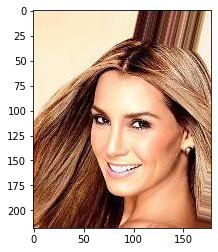

In [14]:
img = mpimg.imread(IMG_DIR + '/' + sorted(listdir(IMG_DIR))[0])
plt.imshow(img)
plt.show()

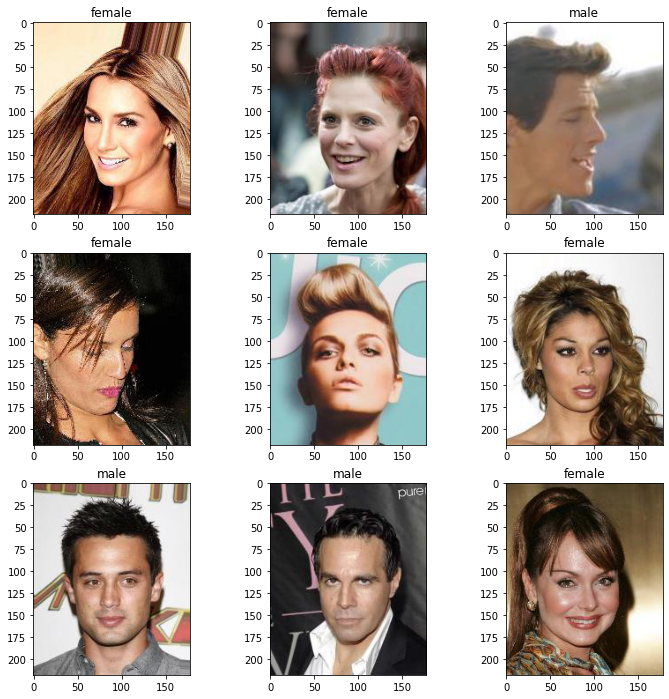

In [15]:
plt.figure(figsize=(12, 12))

for i in range(9) : 
    plt.subplot(3, 3, i + 1)
    img = mpimg.imread(IMG_DIR + '/' + sorted(listdir(IMG_DIR))[i])
    plt.imshow(img)
    plt.title('male' if label[i] == 1 else 'female')
    plt.grid(False)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


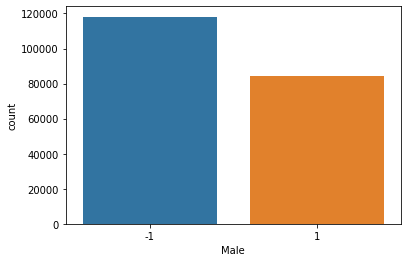

In [16]:
sns.countplot(label)
plt.show()